In [18]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt 

#input for any file name
file_name=input("Enter File Name: ")
journey="down"
file_path=os.path.join('week_data',journey, file_name)

if not os.path.isfile(file_path):
    print(f"Error: File '{file_name}' does not exist.")
else:
    df=pd.read_csv(file_path)

Enter File Name: 04-02-19.csv


In [19]:
bus_no = int(input("Enter bus Number: "))
df = df[df['Schedule Name'].str.contains(rf'\b{bus_no}\b')]

cols=['Schedule Name','Ticket Issued Time','Adult','From Stage','To Stage','Source','Destination']
df=df[cols]

Enter bus Number: 519


In [20]:
source_stage=input("Enter source: ").upper()
destination_stage=input("Enter destination: ").upper()
df=df[(df['Source']==source_stage) & (df['Destination']==destination_stage)]

df['Ticket Issued Time'] = pd.to_datetime(df['Ticket Issued Time'], format='%H:%M:%S')

start=input("Enter Start time: ")
end=input("Enter End time: ")
start_time = pd.to_datetime(start).time()
end_time = pd.to_datetime(end).time()

df = df[(df['Ticket Issued Time'].dt.time >= start_time) & (df['Ticket Issued Time'].dt.time < end_time)]

Enter source: THIRUPORUR
Enter destination: T.NAGAR
Enter Start time: 07:00:00
Enter End time: 08:00:00


In [21]:
bus_stages = [
    'THIRUPORUR', 'KALAVAKKAM', 'CHENGAMMAL', 'ENGG', 'KOMAN NAGAR',
    'KELAMBAKKAM', 'HINDUSTAN', 'PAL. CHEMI', 'CHURCH', 'SIPCOT',
    'NAVALUR', 'CHEMMANCHE', 'KUMARAN NG', 'SHOLINGANALLUR',
    'KARAPAKKAM', 'M K CHAVADI', 'THORAIPAKKAM', 'KANDANCHAV', 
    'SRP TOOLS', 'WPTC', 'ANNA UNIV', 'CONCORDE', 'SAIDAPET', 'T.NAGAR'

]

stage_mapping = {stage: i for i, stage in enumerate(bus_stages)}

df['From Stage'] = df['From Stage'].map(stage_mapping)
df['To Stage'] = df['To Stage'].map(stage_mapping)
df.dropna(subset=['From Stage', 'To Stage'], inplace=True)

od_matrix = pd.DataFrame(index=bus_stages, columns=bus_stages).fillna(0)

In [22]:
for index, row in df.iterrows():
    source = bus_stages[int(row['From Stage'])]
    destination = bus_stages[int(row['To Stage'])]
    adult_count = row['Adult']
    if not pd.isna(adult_count):
        od_matrix.loc[source, destination] += adult_count
    else:
        pass


In [23]:
od_matrix['Boarding'] = od_matrix.sum(axis=1)
od_matrix['Alighting'] = od_matrix.sum(axis=0)

od_matrix['Sum']=od_matrix['Boarding']-od_matrix['Alighting']

arr=od_matrix['Sum'].values
passengers= np.cumsum(arr)


Enter image name img1


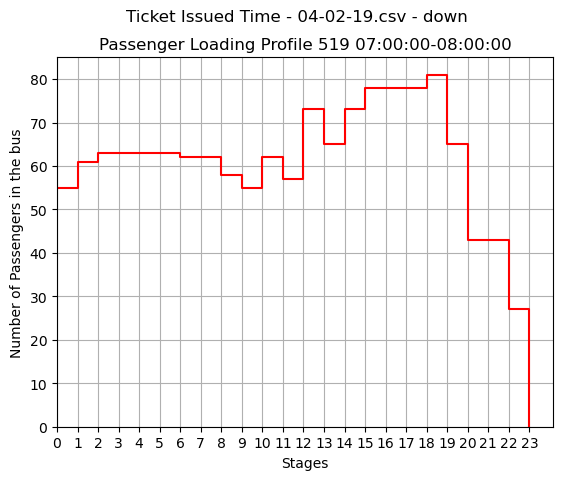

In [26]:
stages = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]

plt.step(stages, passengers, where='post',color='red')
plt.suptitle(f"Ticket Issued Time - {file_name} - {journey}")
plt.title(f"Passenger Loading Profile {bus_no} {start}-{end}")
plt.xlabel('Stages')
plt.ylabel('Number of Passengers in the bus')
plt.xticks(stages)
plt.grid(True)

plt.xlim(left=0)  
plt.ylim(bottom=0)
img_name=input("Enter image name ")
plt.savefig(f"{img_name}.png")
plt.show()
